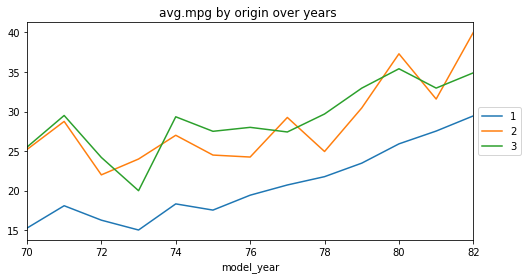

[('Matthew Rozsa', ' August 3, 2017', ' Who would have thought one of the deepest films ever made about learning disabilities would star a talking blue fish?', '3.5/4'), ('Bruce Diones', ' June 27, 2016', ' While not as visually dazzling as its predecessor, the film is still colorful and immersive; the script, while predictable, puts an engaging spin on the issues of home and identity.', ''), ('Christy Lemire', ' June 26, 2016', " It's gorgeous. It's lively. It's got terrific performances from a strong voice cast. It's emotionally affecting without being heavy-handed.", '3/4'), ('Zach Schonfeld', ' June 23, 2016', " Dory's visual palette is such a joy to look at, drawing on the deep blues and greens of the underwater expanse and ocean-dwelling algae.", ''), ('James Berardinelli', ' June 22, 2016', ' Finding Dory is enjoyable in its own right, even if its powerful sense of déjà vu keeps it from approaching the pinnacle of the Disney/Pixar collaborations.', '3/4'), ('Peter Rainer', ' Jun

In [3]:

import pandas as pd
import requests 
from bs4 import BeautifulSoup  
import numpy as np 
import matplotlib.pyplot as plt


def mpg_plot():
    
    df = pd.read_csv('auto-mpg.csv', header=0) 
   
    ctab=pd.crosstab(index=df.model_year,columns=df.origin,values=df.mpg, aggfunc=np.mean)
    
    ctab.plot(kind='line',figsize=(8,4), title="avg.mpg by origin over years ").legend(loc='center left', bbox_to_anchor=(1, 0.5));
   
    plt.show()
    
def getReviews(movie_id):        
    reviews=[]  
    
    page_url="https://www.rottentomatoes.com/m/"+movie_id+"/reviews/?type=top_critics"
    
    page = requests.get(page_url)         
    soup = BeautifulSoup(page.content, 'html.parser')  
    if page.status_code==200:  
            
        SelectData=soup.select("div#reviews div.row.review_table_row")
                                      
        for idx, SelectData in enumerate(SelectData):
           
            reviewer=SelectData.select("div div.critic_name a") 
            
            if reviewer!=[]:
                reviewer=reviewer[0].get_text()

                                                    
            Date=SelectData.select("div.review_date") 
            if Date!=[]:
                Date=Date[0].get_text()

           
            Description=SelectData.select("div.review_desc div.the_review")  
            if Description!=[]:
                Description=Description[0].get_text()

           
            score=SelectData.select("div.review_desc div.small.subtle")  
            if score!=[]:
                score1=score[0].get_text()       
                                            
            reviews.append((reviewer, Date, Description, score1[31:]))
            
    return reviews

if __name__== "__main__":
    mpg_plot()
    
    movie_id='finding_dory'    
    reviews=getReviews(movie_id) 
    
    
    
    print(reviews)
